In [3]:
import EasyLM
print("EasyLM __file__ in notebook:", EasyLM.__file__)

# Test submodule imports explicitly
try:
    from EasyLM import exceptions, utils, base_model, summary_formatter, linear_model, model_comparator, plot_helper
    print("Submodules imported directly from EasyLM package.")
except Exception as e:
    print("Importing submodules from EasyLM failed:", repr(e))

# Test the original style
try:
    from EasyLM.exceptions import EasyLMError, FitError, PredictError
    print("from EasyLM.exceptions import ... works")
except Exception as e:
    print("from EasyLM.exceptions import ... failed:", repr(e))


ModuleNotFoundError: No module named 'EasyLM'

In [ ]:
import numpy as np
from EasyLM import LinearModel
# Create sample data: y = 2 + 3x + noise
np.random.seed(42)
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = 2 + 3 * X.ravel() + np.random.randn(5) * 0.5

# Fit the model
model = LinearModel()
model.fit(X, y)

# View R-style summary
print(model.summary())

Call: EasyLM LinearModel

Observations: 5
Parameters: 2
Degrees of Freedom (resid): 3

Coefficients:
   Coef.  Std.Err.  t value  Pr(>|t|)
0 2.1996    0.4284   5.1340    0.0143
1 3.0100    0.1292  23.3013    0.0002

Residual variance (sigma^2): 0.1669
R-squared: 0.9945
AIC: -7.5070
BIC: -8.2881


**1. Simple Linear Regression**

In [8]:
import pandas as pd
from EasyLM import LinearModel

# Create dataset with multiple predictors
np.random.seed(123)
n = 50

df = pd.DataFrame({
    'sales': 100 + 5*np.random.randn(n),
    'advertising': 10 + 2*np.random.randn(n),
    'price': 50 + 10*np.random.randn(n),
    'competition': 3 + np.random.randn(n)
})

# True relationship: sales = 80 + 2*advertising - 0.5*price + noise
df['sales'] = 80 + 2*df['advertising'] - 0.5*df['price'] + np.random.randn(n)*5

# Fit model
X = df[['advertising', 'price', 'competition']].values
y = df['sales'].values

model = LinearModel(add_intercept=True)
model.fit(X, y)

print(model.summary())

# Make predictions
new_data = np.array([[12, 55, 3.5]])  # advertising=12, price=55, competition=3.5
prediction = model.predict(new_data)
print(f"\nPredicted sales: ${prediction[0]:.2f}")

Call: EasyLM LinearModel

Observations: 50
Parameters: 4
Degrees of Freedom (resid): 46

Coefficients:
    Coef.  Std.Err.  t value  Pr(>|t|)
0 78.9708    5.7667  13.6943    0.0000
1  2.0496    0.3046   6.7285    0.0000
2 -0.4792    0.0657  -7.2971    0.0000
3 -0.3970    0.7054  -0.5629    0.5762

Residual variance (sigma^2): 19.7286
R-squared: 0.7407
AIC: 152.9343
BIC: 160.5824

Predicted sales: $75.82


**2. Multiple Regressions**

In [10]:
from EasyLM import LinearModel, ModelComparator, PlotHelper
import matplotlib.pyplot as plt

# Generate data
np.random.seed(42)
n = 100
X1 = np.random.randn(n)
X2 = np.random.randn(n)
X3 = np.random.randn(n)
y = 2 + 3*X1 + 1.5*X2 + np.random.randn(n) * 0.5

# Fit three models with different features
model1 = LinearModel()
model1.fit(np.column_stack([X1]), y)
model1.name = "Simple: X1"

model2 = LinearModel()
model2.fit(np.column_stack([X1, X2]), y)
model2.name = "Multiple: X1 + X2"

model3 = LinearModel()
model3.fit(np.column_stack([X1, X2, X3]), y)
model3.name = "Full: X1 + X2 + X3"

# Compare models
comparator = ModelComparator([model1, model2, model3])
print(comparator.compare())

                           aic         bic  r_squared  n_params  n_obs
model                                                                 
Simple: X1           79.372163   84.582504   0.737255         2    100
Multiple: X1 + X2  -161.386841 -153.571331   0.976813         3    100
Full: X1 + X2 + X3 -159.495085 -149.074405   0.976838         4    100


**3. Compare Multiple Models**

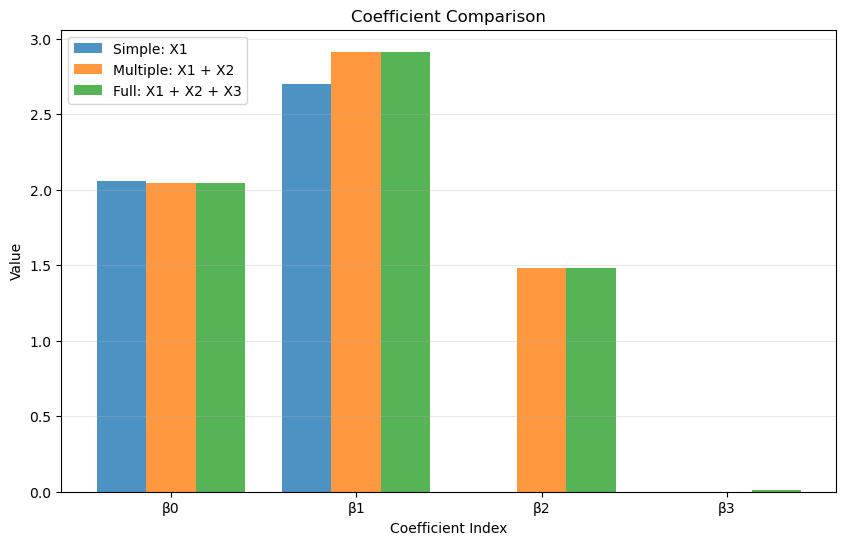

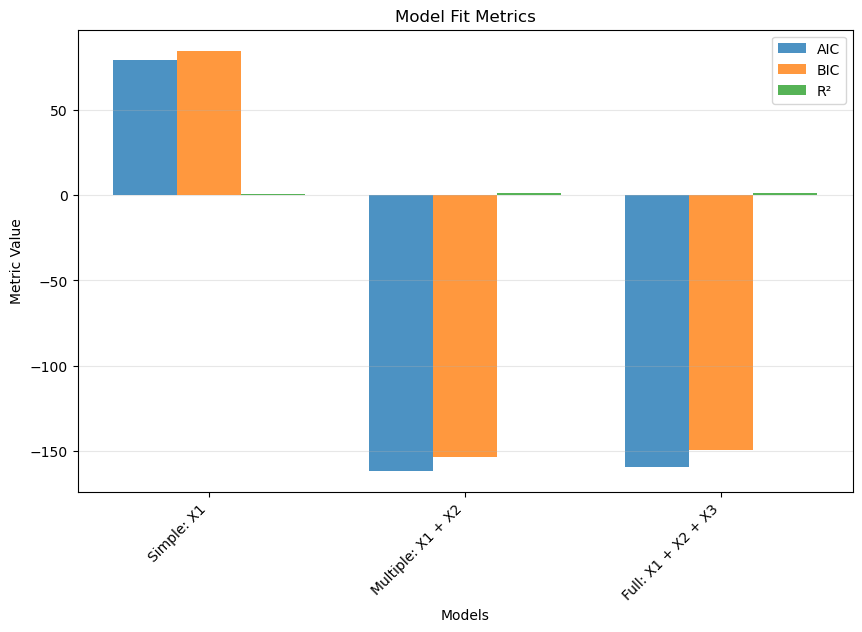

In [11]:
# Coefficient comparison - works for ALL models
PlotHelper.plot_coefficients_comparison(
    models=[model1, model2, model3],
    labels=["Simple: X1", "Multiple: X1 + X2", "Full: X1 + X2 + X3"]
)
plt.show()

# Metrics comparison (AIC, BIC, R²)
PlotHelper.plot_model_metrics(
    models=[model1, model2, model3],
    labels=["Simple: X1", "Multiple: X1 + X2", "Full: X1 + X2 + X3"]
)
plt.show()

**4. Visualization Basic Plots**

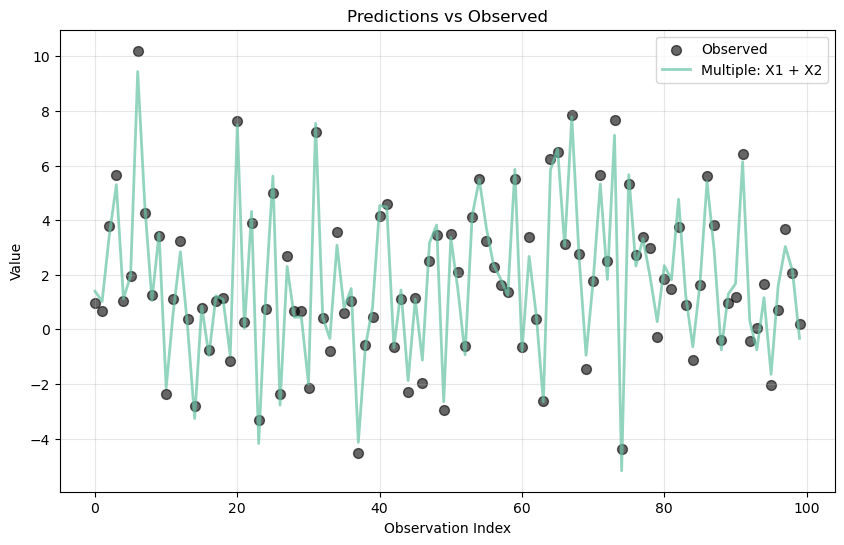

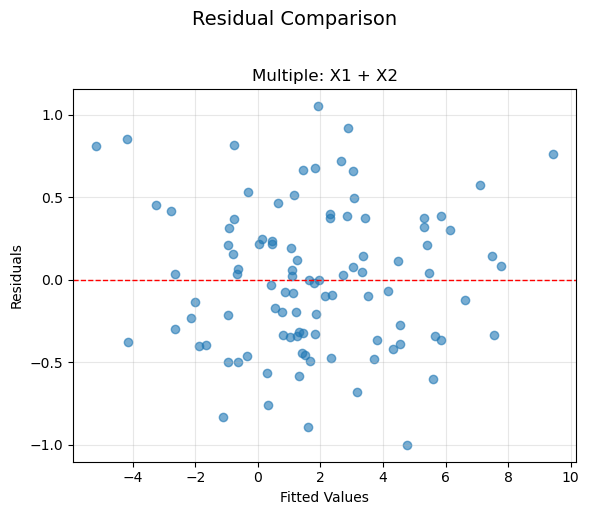

In [12]:
# For single model visualization
X_for_model2 = np.column_stack([X1, X2])

PlotHelper.plot_predictions_comparison(
    models=[model2],
    X=X_for_model2,
    y=y,
    labels=["Multiple: X1 + X2"]
)
plt.show()

# Residual plot
PlotHelper.plot_residuals_comparison(
    models=[model2],
    X=X_for_model2,
    y=y,
    labels=["Multiple: X1 + X2"]
)
plt.show()

**5. Visualization: Preidiction and Residuals**

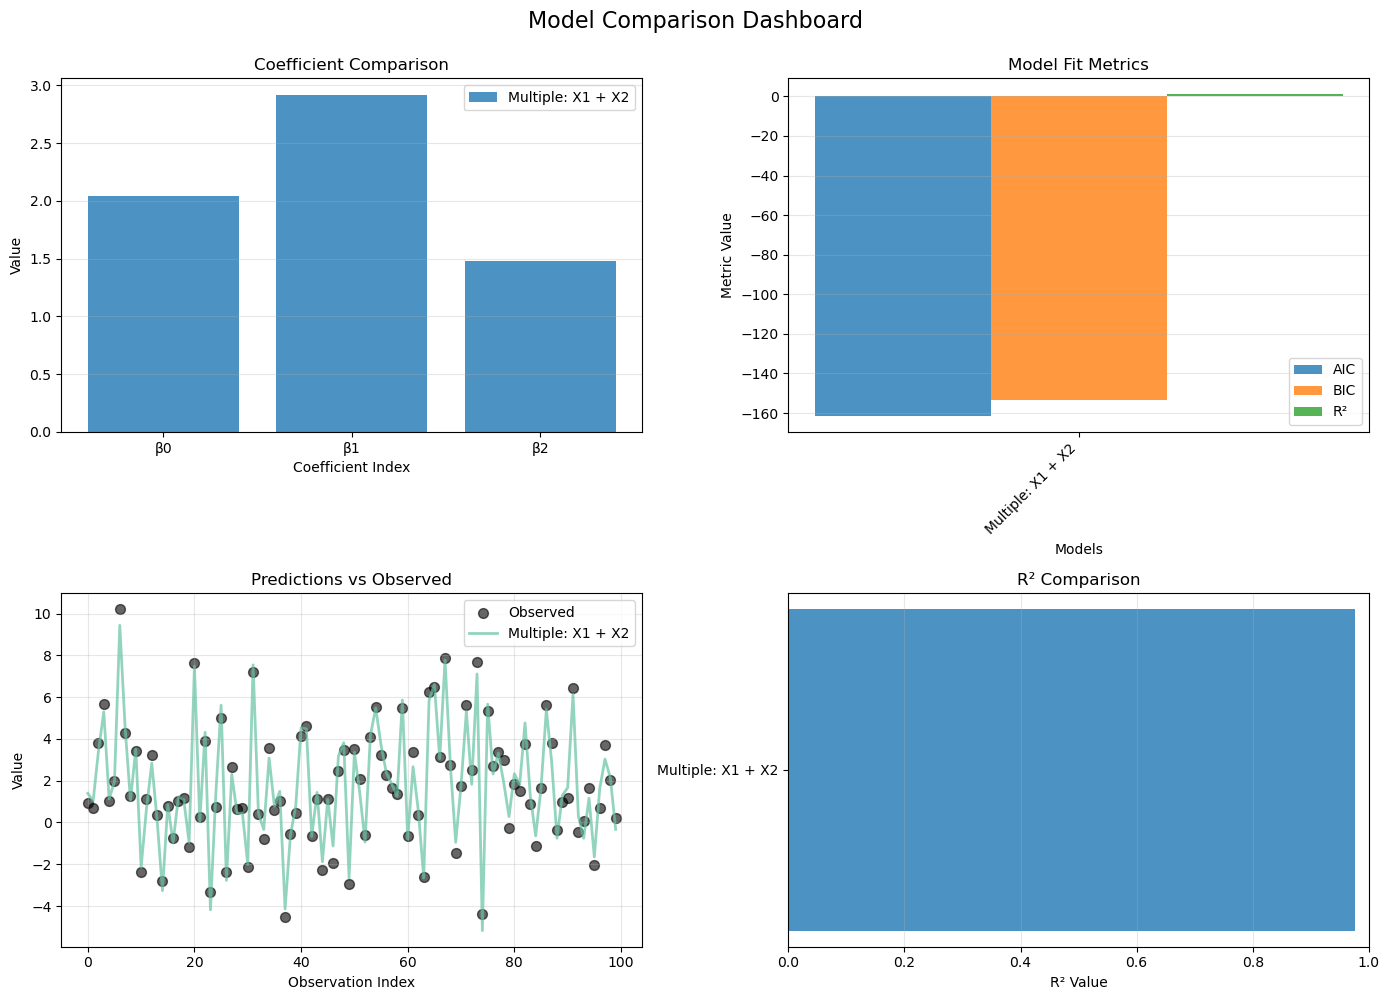

In [13]:
# Create a complete 2x2 comparison dashboard for a single model
X_for_model2 = np.column_stack([X1, X2])

fig = PlotHelper.plot_comprehensive_comparison(
    models=[model2],
    X=X_for_model2,
    y=y,
    labels=["Multiple: X1 + X2"]
)
plt.show()

**6. Comparison Dashboard**

Data check: X1=100, X2=100, X3=100, y=100


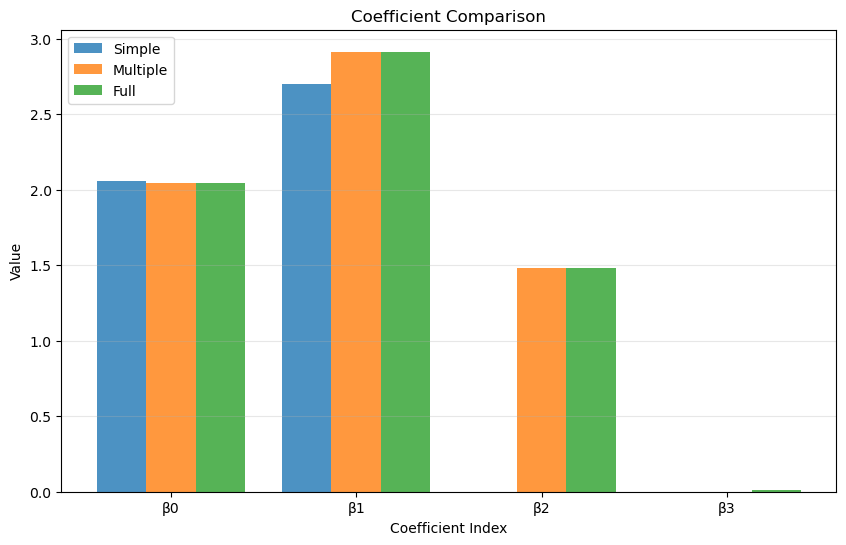

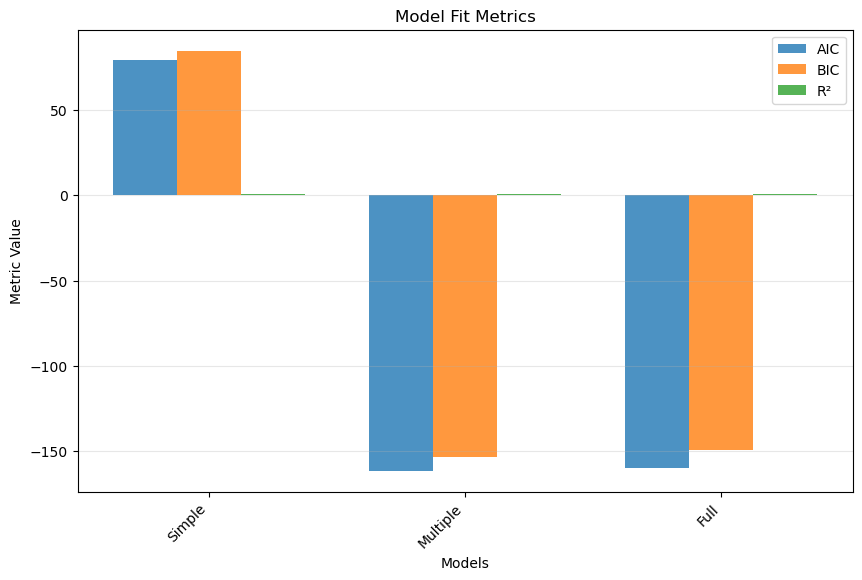

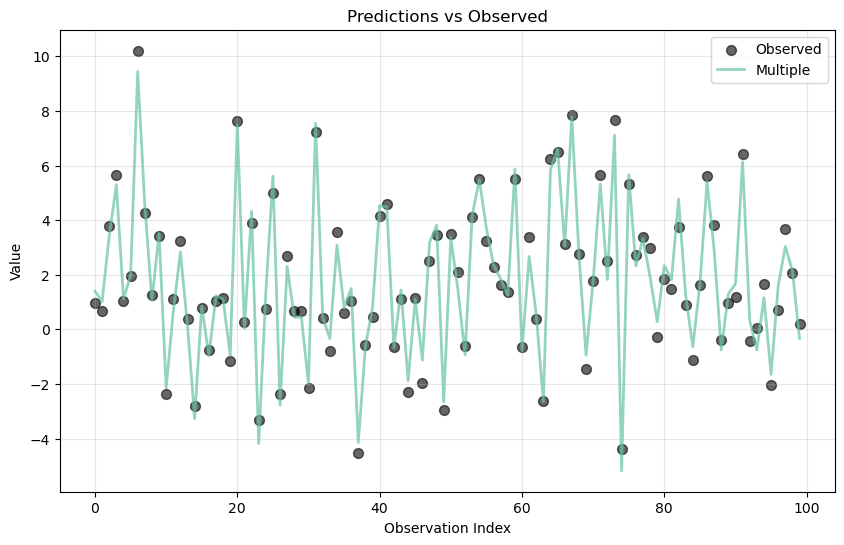

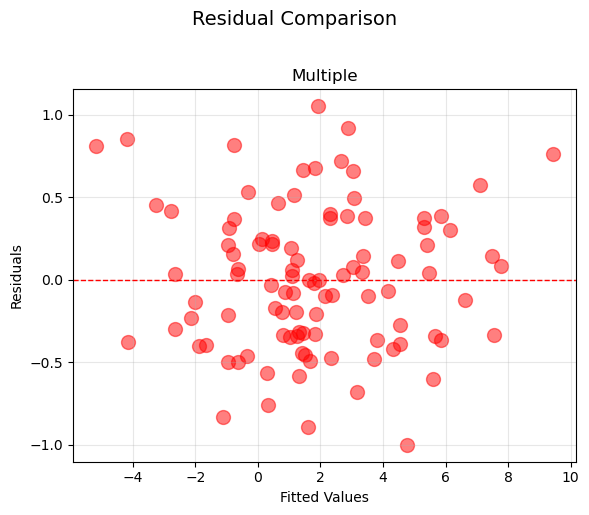

Success! All plots generated without errors.


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from EasyLM import LinearModel, PlotHelper

# Step 1: Generate data ONCE
np.random.seed(42)
n = 100
X1 = np.random.randn(n)  # 100 values
X2 = np.random.randn(n)  # 100 values
X3 = np.random.randn(n)  # 100 values
y = 2 + 3*X1 + 1.5*X2 + np.random.randn(n) * 0.5  # 100 values

print(f"Data check: X1={len(X1)}, X2={len(X2)}, X3={len(X3)}, y={len(y)}")

# Step 2: Fit models with proper reshaping
model1 = LinearModel()
model1.fit(X1.reshape(-1, 1), y)  # Shape: (100, 1) and (100,) ✓
model1.name = "Simple"

model2 = LinearModel()
X_for_model2 = np.column_stack([X1, X2])  # Shape: (100, 2) ✓
model2.fit(X_for_model2, y)  # Shape: (100, 2) and (100,) ✓
model2.name = "Multiple"

model3 = LinearModel()
X_for_model3 = np.column_stack([X1, X2, X3])  # Shape: (100, 3) ✓
model3.fit(X_for_model3, y)  # Shape: (100, 3) and (100,) ✓
model3.name = "Full"

# Step 3: Plot comparisons (these work on any models)
PlotHelper.plot_coefficients_comparison([model1, model2, model3])
plt.show()

PlotHelper.plot_model_metrics([model1, model2, model3])
plt.show()

# Step 4: Predictions/residuals (need matching X)
PlotHelper.plot_predictions_comparison([model2], X_for_model2, y)
plt.show()

PlotHelper.plot_residuals_comparison([model2], X_for_model2, y, 
                                    color='red', alpha=0.5, s=100)
plt.show()

print("Success! All plots generated without errors.")

**7. Customize Plots**

In [15]:
import pandas as pd
from EasyLM import LinearModel

# Load or create DataFrame
df = pd.DataFrame({
    'income': [45, 52, 38, 67, 73, 89, 45, 56],
    'education': [12, 16, 11, 18, 20, 22, 12, 14],
    'experience': [5, 8, 3, 12, 15, 20, 4, 7],
    'age': [28, 32, 26, 38, 42, 48, 27, 31]
})

# Prepare features
X = df[['education', 'experience']].values
y = df['income'].values

# Fit and summarize
model = LinearModel()
model.fit(X, y)
print(model.summary())

# Access key metrics
print(f"\nR² = {model.r_squared():.4f}")
print(f"AIC = {model.aic():.2f}")
print(f"BIC = {model.bic():.2f}")

# Access coefficients
print(f"\nCoefficients: {model.params_}")

Call: EasyLM LinearModel

Observations: 8
Parameters: 3
Degrees of Freedom (resid): 5

Coefficients:
    Coef.  Std.Err.  t value  Pr(>|t|)
0 38.2835   13.6220   2.8104    0.0375
1 -0.6918    1.4368  -0.4815    0.6505
2  3.3135    0.9831   3.3705    0.0199

Residual variance (sigma^2): 7.2857
R-squared: 0.9822
AIC: 18.1272
BIC: 18.3656

R² = 0.9822
AIC = 18.13
BIC = 18.37

Coefficients: [38.28348598 -0.6917573   3.31353749]


**8. Working with Data Frames**


MODEL DIAGNOSTICS


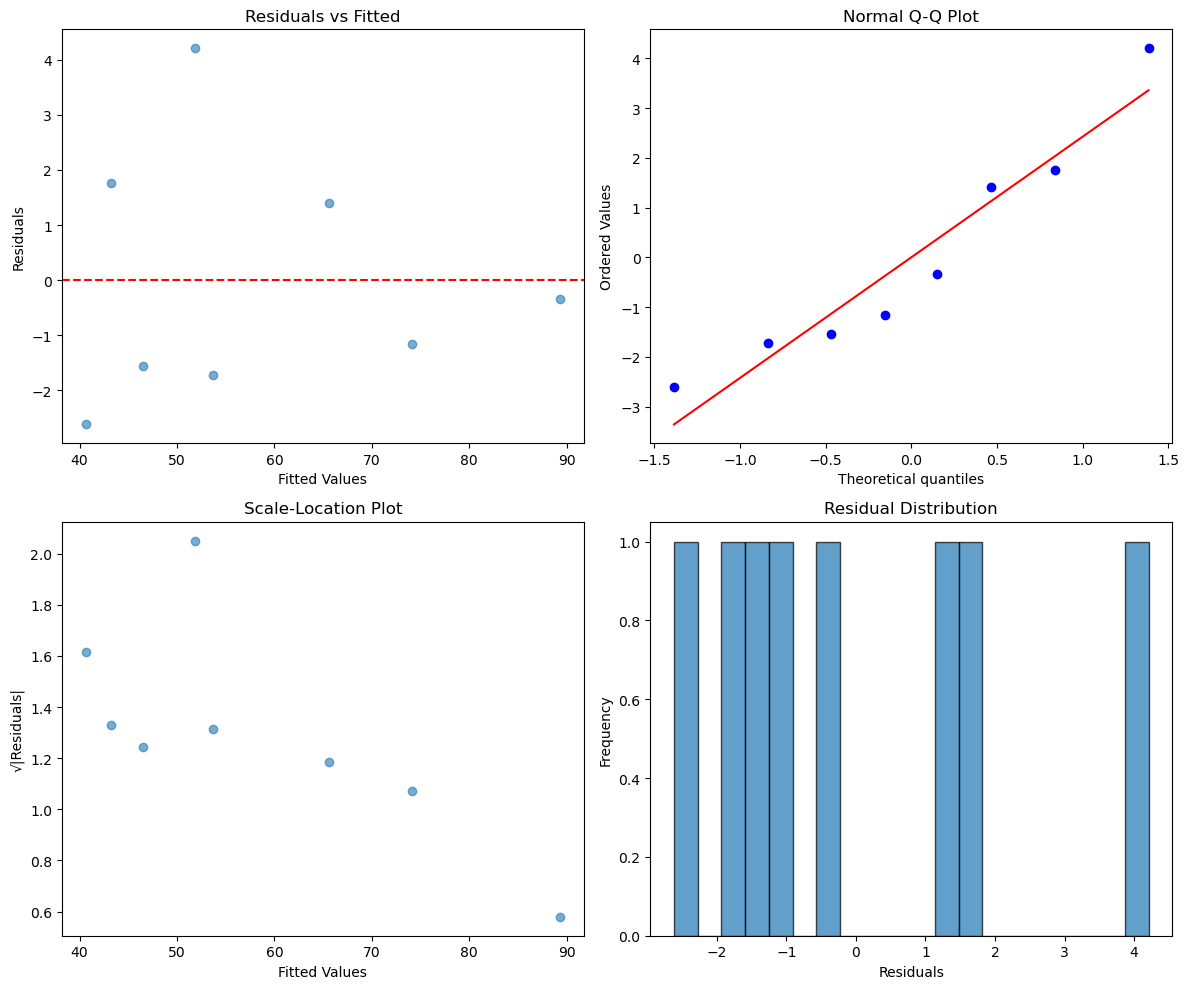

In [17]:
from scipy import stats as sp_stats
print("\n" + "="*60)
print("MODEL DIAGNOSTICS")
print("="*60)

# Extract residuals and fitted values
residuals = model._stats.residuals
fitted = model._stats.fitted_values

# Create diagnostic plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Residuals vs Fitted
axes[0, 0].scatter(fitted, residuals, alpha=0.6)
axes[0, 0].axhline(y=0, color='red', linestyle='--')
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted')

# 2. Q-Q Plot
sp_stats.probplot(residuals, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Normal Q-Q Plot')

# 3. Scale-Location
axes[1, 0].scatter(fitted, np.sqrt(np.abs(residuals)), alpha=0.6)
axes[1, 0].set_xlabel('Fitted Values')
axes[1, 0].set_ylabel('√|Residuals|')
axes[1, 0].set_title('Scale-Location Plot')

# 4. Histogram of Residuals
axes[1, 1].hist(residuals, bins=20, edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('Residuals')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Residual Distribution')

plt.tight_layout()
plt.show()

**9. Diagnostics**

In [18]:
import numpy as np
import pandas as pd
from EasyLM import LinearModel, PlotHelper
from scipy import stats as sp_stats
import matplotlib.pyplot as plt

# =====================================================
# GENERATE CONSISTENT DATA ONCE
# =====================================================
np.random.seed(42)
n = 100
X1 = np.random.randn(n)
X2 = np.random.randn(n)
y = 2 + 3*X1 + 1.5*X2 + np.random.randn(n) * 0.5

# Prepare feature matrix
X = np.column_stack([X1, X2])

# =====================================================
# 1. COEFFICIENT INTERPRETATION (Fixed)
# =====================================================
print("="*60)
print("COEFFICIENT INTERPRETATION")
print("="*60)

model = LinearModel()
model.fit(X, y)  # Both have 100 rows - works!

stats = model._stats
print("\nDetailed Coefficient Analysis:")
print("-" * 50)
coef_table = stats.get_coefficient_table()

for i, (coef, se, t, p) in enumerate(zip(
    coef_table['coef'],
    coef_table['std_err'],
    coef_table['t'],
    coef_table['p']
)):
    name = "Intercept" if i == 0 else f"β{i}"
    sig = "***" if p < 0.001 else "**" if p < 0.01 else "*" if p < 0.05 else ""
    print(f"{name:12s}: {coef:7.3f} (SE={se:.3f}, t={t:.2f}, p={p:.4f}) {sig}")

print("\nSignificance codes: *** p<0.001, ** p<0.01, * p<0.05")

COEFFICIENT INTERPRETATION

Detailed Coefficient Analysis:
--------------------------------------------------
Intercept   :   2.044 (SE=0.054, t=37.78, p=0.0000) ***
β1          :   3.113 (SE=0.060, t=51.84, p=0.0000) ***
β2          :   1.494 (SE=0.057, t=26.12, p=0.0000) ***

Significance codes: *** p<0.001, ** p<0.01, * p<0.05


**10. Coefficient Interpretation**